### Lendo bases de treino e teste

In [1]:
import pickle

In [2]:
with open('../Bases/census_adult.pkl', 'rb') as file:
   X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = pickle.load(file=file)

In [3]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [4]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

### Arvore de decisão -

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
arvore_census = DecisionTreeClassifier(criterion="entropy", random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
previsao = arvore_census.predict(X_census_teste)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

#### Metricas

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
accuracy_score(y_census_teste, previsao)

0.8104401228249745

In [12]:
confusion_matrix(y_census_teste, previsao)

array([[3227,  466],
       [ 460,  732]], dtype=int64)

In [13]:
from yellowbrick.classifier import ConfusionMatrix

0.8104401228249745

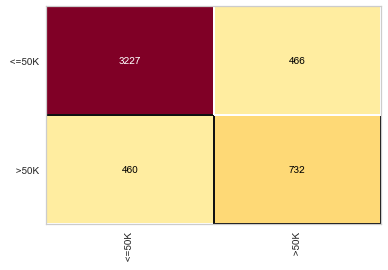

In [14]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [16]:
print(classification_report(y_census_teste, previsao))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



[Text(0.5112669640554626, 0.9905660377358491, 'X[27] <= 0.08\nentropy = 0.795\nsamples = 27676\nvalue = [21027, 6649]\nclass = ['),
 Text(0.19099149959561004, 0.9716981132075472, 'X[105] <= 0.812\nentropy = 0.345\nsamples = 14973\nvalue = [14008, 965]\nclass = ['),
 Text(0.12818795496793883, 0.9528301886792453, 'X[104] <= 0.94\nentropy = 0.28\nsamples = 14710\nvalue = [13998, 712]\nclass = ['),
 Text(0.06197748268303499, 0.9339622641509434, 'X[102] <= -0.886\nentropy = 0.165\nsamples = 11845\nvalue = [11558, 287]\nclass = ['),
 Text(0.009759620692042429, 0.9150943396226415, 'X[106] <= 5.695\nentropy = 0.031\nsamples = 4645\nvalue = [4630, 15]\nclass = ['),
 Text(0.00928062090347593, 0.8962264150943396, 'X[107] <= 0.329\nentropy = 0.028\nsamples = 4643\nvalue = [4630, 13]\nclass = ['),
 Text(0.00514924772708987, 0.8773584905660378, 'X[52] <= 2.11\nentropy = 0.013\nsamples = 4172\nvalue = [4167, 5]\nclass = ['),
 Text(0.003592498414248747, 0.8584905660377359, 'X[2] <= 1.777\nentropy = 0.

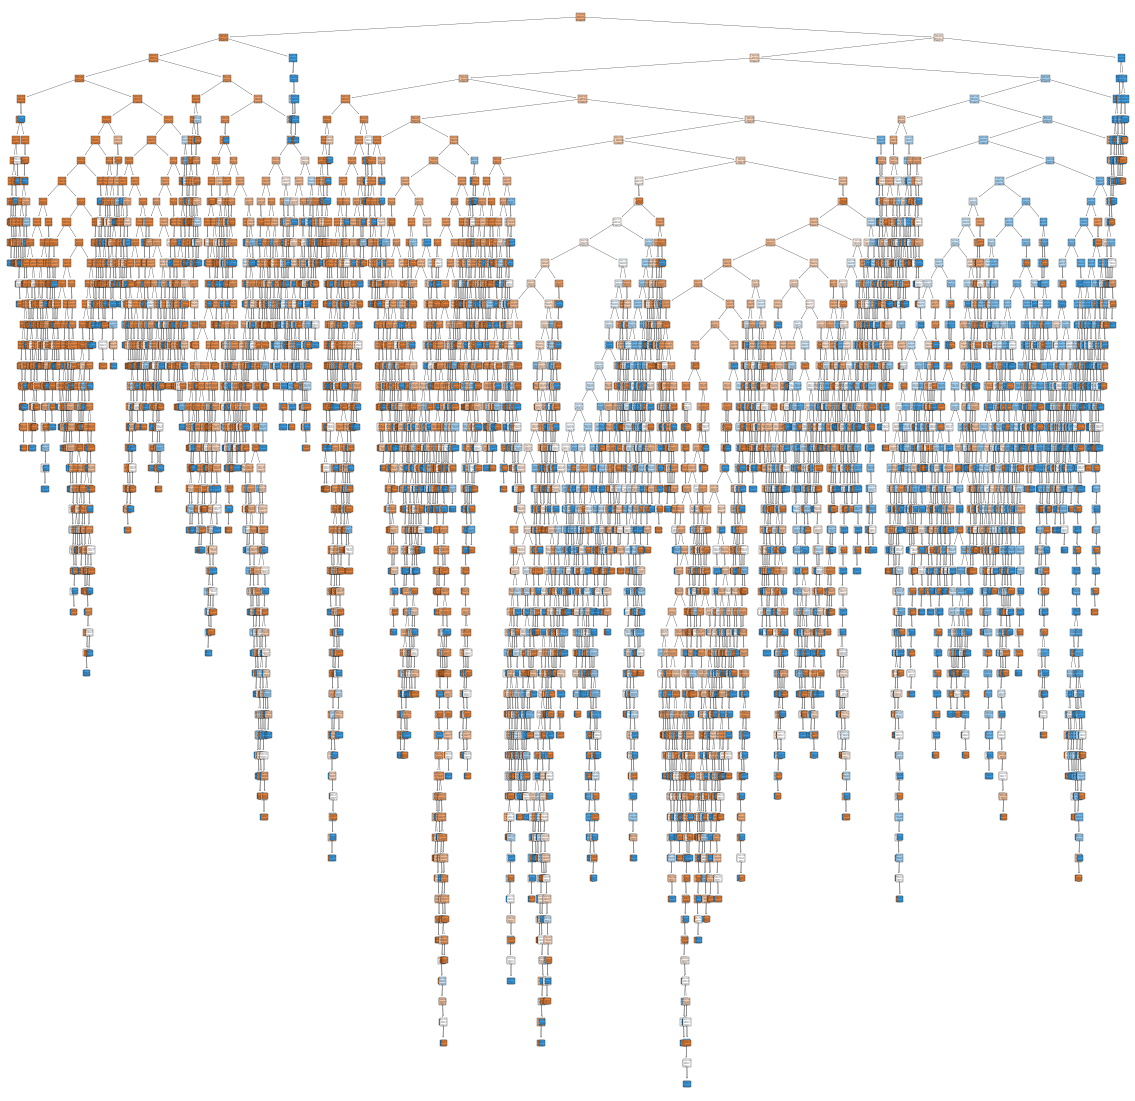

In [24]:
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_census, class_names=str(arvore_census.classes_), filled=True)